In [1]:
import requests
import json
import pandas as pd
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
visits_2019 = pd.read_csv('Data/Annual Park Visits.csv', sep = ',', skiprows = [0,1,2], thousands=',' )
visits = visits_2019.rename({'Rank': 'Rank_2019','Value': 'Visits_2019', 'PercentOfTotal': 'Percent_total_2019'}, axis = 'columns')
visits.head()# change value and percent to 2019 identifier

ParkName  Rank_2019  Visits_2019 Percent_total_2019
0           Golden Gate NRA          1     15002227              4.58%
1           Blue Ridge PKWY          2     14976085              4.57%
2  Great Smoky Mountains NP          3     12547743              3.83%
3               Gateway NRA          4      9405622              2.87%
4          Lincoln Memorial          5      7808182              2.38%

In [3]:
NP_use = pd.read_csv('Data/National Park Public Use Statistics.csv', sep = ',', skiprows = [0,1,2], thousands=',', parse_dates= {'Month_Year': [5,6]})
NP_use.head(1)

Month_Year   ParkName UnitCode       ParkType      Region State  \
0 1979-01-01  Acadia NP     ACAD  National Park  Northeast     ME   

   RecreationVisits  NonRecreationVisits  RecreationHours  NonRecreationHours  \
0              6011                15252            37446               15252   

   ...  NonRecreationVisitsTotal  RecreationHoursTotal  \
0  ...                    395913              17155530   

   NonRecreationHoursTotal  ConcessionerLodgingTotal  \
0                   198056                         0   

   ConcessionerCampingTotal  TentCampersTotal  RVCampersTotal  \
0                         0            139708           74279   

  BackcountryTotal NonRecreationOvernightStaysTotal  \
0                0                                0   

  MiscellaneousOvernightStaysTotal  
0                                0  

[1 rows x 34 columns]

In [4]:
visits_2022 = pd.read_csv('Data/NP Use Statistics (2020-2022).csv', sep = ',', thousands=',', parse_dates= {'Month_Year': [5,6]})
visits_2022.head(1)

Month_Year   ParkName UnitCode       ParkType      Region State  \
0 2020-01-01  Acadia NP     ACAD  National Park  Northeast     ME   

   RecreationVisits  NonRecreationVisits  RecreationHours  NonRecreationHours  \
0             12640                  600            83421                 600   

   ...  NonRecreationVisitsTotal  RecreationHoursTotal  \
0  ...                     47100              14264234   

   NonRecreationHoursTotal  ConcessionerLodgingTotal  \
0                    47100                         0   

   ConcessionerCampingTotal  TentCampersTotal  RVCampersTotal  \
0                       307                 0               0   

  BackcountryTotal NonRecreationOvernightStaysTotal  \
0                0                                0   

  MiscellaneousOvernightStaysTotal  
0                                0  

[1 rows x 34 columns]

In [5]:
NP_visit = NP_use[['Month_Year','ParkName', 'ParkType', 'Region', 'State','RecreationVisits','ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry']]
NP_visit.tail(1)

Month_Year ParkName       ParkType          Region State  \
29938 2019-12-01  Zion NP  National Park  Intermountain     UT   

       RecreationVisits  ConcessionerLodging  ConcessionerCamping  \
29938            171706                 5752                    0   

       TentCampers  RVCampers  Backcountry  
29938         1895       1493          166

In [6]:
NP_visit_22 = visits_2022[['Month_Year','ParkName', 'ParkType', 'Region', 'State','RecreationVisits','ConcessionerLodging', 'ConcessionerCamping', 'TentCampers', 'RVCampers', 'Backcountry']]
NP_visit_22.tail(1)

Month_Year ParkName       ParkType          Region State  \
2267 2022-12-01  Zion NP  National Park  Intermountain     UT   

      RecreationVisits  ConcessionerLodging  ConcessionerCamping  TentCampers  \
2267            176846                 3480                    0         2006   

      RVCampers  Backcountry  
2267       5098           91

In [7]:
NP_visit2 = pd.concat([NP_visit, NP_visit_22])
NP_visit= NP_visit2.sort_values(['ParkName','Month_Year'])
NP_visit.tail()

Month_Year ParkName       ParkType          Region State  \
2263 2022-08-01  Zion NP  National Park  Intermountain     UT   
2264 2022-09-01  Zion NP  National Park  Intermountain     UT   
2265 2022-10-01  Zion NP  National Park  Intermountain     UT   
2266 2022-11-01  Zion NP  National Park  Intermountain     UT   
2267 2022-12-01  Zion NP  National Park  Intermountain     UT   

      RecreationVisits  ConcessionerLodging  ConcessionerCamping  TentCampers  \
2263            437134                 6120                    0        17844   
2264            423654                 4682                    0        13661   
2265            459697                 4831                    0        12454   
2266            291044                 4129                    0         6578   
2267            176846                 3480                    0         2006   

      RVCampers  Backcountry  
2263       8981          616  
2264       8292          601  
2265       9312         1472  
2266       5182          457  
2267       5098           91

In [9]:
NP_visit.set_index(NP_visit['Month_Year'], inplace = True)
NP_visit.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32207 entries, 1979-01-01 to 2022-12-01
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Month_Year           32207 non-null  datetime64[ns]
 1   ParkName             32207 non-null  object        
 2   ParkType             32207 non-null  object        
 3   Region               32207 non-null  object        
 4   State                32207 non-null  object        
 5   RecreationVisits     32207 non-null  int64         
 6   ConcessionerLodging  32207 non-null  int64         
 7   ConcessionerCamping  32207 non-null  int64         
 8   TentCampers          32207 non-null  int64         
 9   RVCampers            32207 non-null  int64         
 10  Backcountry          32207 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 2.9+ MB


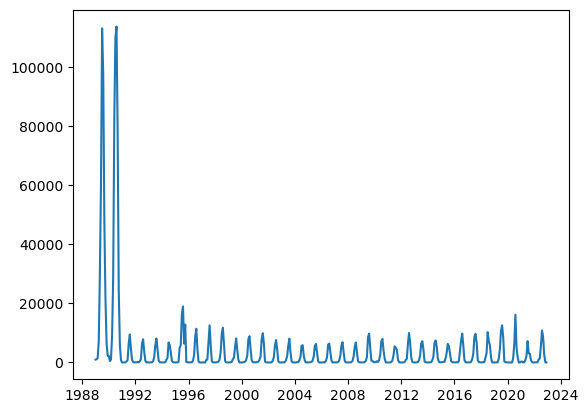

In [21]:
#something is wrong starting here. found a tourism article that says 40,000 people visited in 2019. pics look beautiful/mountainous. 
#maybe reported units in thousands of visitors missing zeros?
#maybe they got rid of some activity that used to draw more people, or counting method
Ncascades = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == 'North Cascades NP',])
Ncasc_90s = Ncascades.loc[Ncascades ['Month_Year']['1989-01-01':'2022-12-01'],]
plt.plot(Ncasc_90s['RecreationVisits'])

In [20]:
#from other df of 2019 visitation data 
visits.loc[visits['ParkName'].str.contains('Cascades')]

ParkName  Rank_2019  Visits_2019 Percent_total_2019
305  North Cascades NP        306        38208              0.01%

### Not sure what to do about Cascades NP there is something off. Maybe drop the first couple of years or replace them with the nearest values

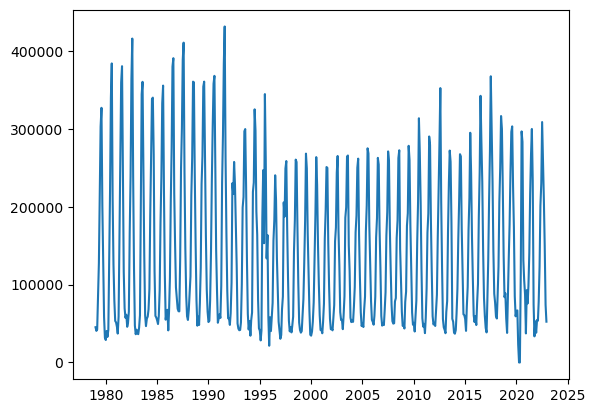

In [22]:
#'Kings Canyon NP', 'Sequoia NP'. Create a dataframe for each NP
#concat the two together then aggregate by sum using Month_Year

Sequoia = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == 'Sequoia NP',])
Kings = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == 'Kings Canyon NP',])
combine = pd.concat([Sequoia, Kings])
combine.drop('Month_Year', axis = 1, inplace= True)
King_S = combine.groupby('Month_Year').agg('sum')
plt.plot(King_S['RecreationVisits'])

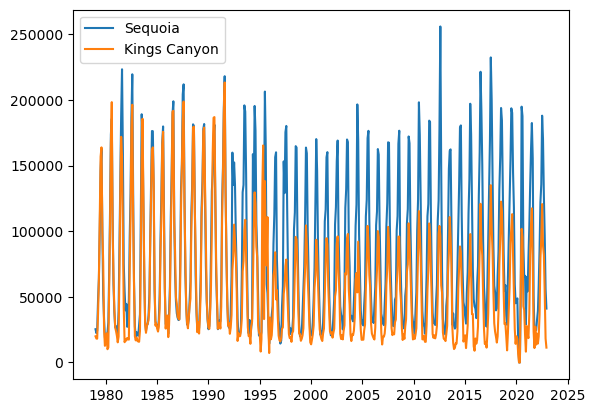

In [23]:
plt.plot(Sequoia['RecreationVisits'])
plt.plot(Kings['RecreationVisits'])
plt.legend(['Sequoia', 'Kings Canyon'])
plt.show()

In [18]:
# Add new columns with categorical values populated 
add_cols = {'ParkName': 'Sequoia and Kings Canyon NP' , 'ParkType': 'National Park' , 'Region': 'Pacific West', 'State': 'CA'}
for key, value in add_cols.items():
    King_S[key] = value
King_S.tail()

RecreationVisits  ConcessionerLodging  ConcessionerCamping  \
Month_Year                                                               
2022-08-01            259541                 9052                    0   
2022-09-01            208842                 9618                    0   
2022-10-01            149950                 9303                    0   
2022-11-01             74022                 4652                    0   
2022-12-01             52382                    0                    0   

            TentCampers  RVCampers  Backcountry                     ParkName  \
Month_Year                                                                     
2022-08-01        45572      24696        12638  Sequoia and Kings Canyon NP   
2022-09-01        28136      18714         4301  Sequoia and Kings Canyon NP   
2022-10-01        10379       7899          357  Sequoia and Kings Canyon NP   
2022-11-01         1685       1027            0  Sequoia and Kings Canyon NP   
2022-12-01          258        118            0  Sequoia and Kings Canyon NP   

                 ParkType        Region State  
Month_Year                                     
2022-08-01  National Park  Pacific West    CA  
2022-09-01  National Park  Pacific West    CA  
2022-10-01  National Park  Pacific West    CA  
2022-11-01  National Park  Pacific West    CA  
2022-12-01  National Park  Pacific West    CA

In [26]:
#drop Month_Year column,keep index, append King_S, drop Kings Canyon and Sequoia
NP_visit1 = NP_visit.drop('Month_Year', axis = 'columns')
#parks = parks.drop(parks[parks['park']== 'Kings Canyon National Park'].index)
NP_visit1.shape

(29939, 10)

In [27]:
NP_visit1 = NP_visit1.append(King_S)
NP_visit1.shape

(30431, 10)

In [28]:
NP_visit1.reset_index(inplace = True)
NP_visit1.head()

Month_Year   ParkName       ParkType      Region State  RecreationVisits  \
0 1979-01-01  Acadia NP  National Park  Northeast     ME              6011   
1 1979-02-01  Acadia NP  National Park  Northeast     ME              5243   
2 1979-03-01  Acadia NP  National Park  Northeast     ME             11165   
3 1979-04-01  Acadia NP  National Park  Northeast     ME            219351   
4 1979-05-01  Acadia NP  National Park  Northeast     ME            339416   

   ConcessionerLodging  ConcessionerCamping  TentCampers  RVCampers  \
0                    0                    0          102         13   
1                    0                    0           53          8   
2                    0                    0          176         37   
3                    0                    0         1037        459   
4                    0                    0         3193       1148   

   Backcountry  
0            0  
1            0  
2            0  
3            0  
4            0

In [29]:
#get rid of Kings and Sequoia
NP_visit1 = NP_visit1.drop(NP_visit1[NP_visit1['ParkName']=='Kings Canyon NP'].index)
NP_visit1 = NP_visit1.drop(NP_visit1[NP_visit1['ParkName']=='Sequoia NP'].index)
NP_visit1.shape

(29447, 11)

In [30]:
#save above to merge
NP_visit2 = NP_visit1
NP_visit2['Month_Year'] = NP_visit2['Month_Year'].dt.strftime('%Y-%m')
NP_visit2.head()

Month_Year   ParkName       ParkType      Region State  RecreationVisits  \
0    1979-01  Acadia NP  National Park  Northeast     ME              6011   
1    1979-02  Acadia NP  National Park  Northeast     ME              5243   
2    1979-03  Acadia NP  National Park  Northeast     ME             11165   
3    1979-04  Acadia NP  National Park  Northeast     ME            219351   
4    1979-05  Acadia NP  National Park  Northeast     ME            339416   

   ConcessionerLodging  ConcessionerCamping  TentCampers  RVCampers  \
0                    0                    0          102         13   
1                    0                    0           53          8   
2                    0                    0          176         37   
3                    0                    0         1037        459   
4                    0                    0         3193       1148   

   Backcountry  
0            0  
1            0  
2            0  
3            0  
4            0

In [31]:
NP_visit2.shape

(29447, 11)

In [10]:
Parks_unique = list(NP_visit['ParkName'].unique())
print(Parks_unique)
print(len(Parks_unique))


['Acadia NP', 'Arches NP', 'Badlands NP', 'Big Bend NP', 'Biscayne NP', 'Black Canyon of the Gunnison NP', 'Bryce Canyon NP', 'Canyonlands NP', 'Capitol Reef NP', 'Carlsbad Caverns NP', 'Channel Islands NP', 'Congaree NP', 'Crater Lake NP', 'Cuyahoga Valley NP', 'Death Valley NP', 'Denali NP & PRES', 'Dry Tortugas NP', 'Everglades NP', 'Gates of the Arctic NP & PRES', 'Gateway Arch NP', 'Glacier Bay NP & PRES', 'Glacier NP', 'Grand Canyon NP', 'Grand Teton NP', 'Great Basin NP', 'Great Sand Dunes NP & PRES', 'Great Smoky Mountains NP', 'Guadalupe Mountains NP', 'Haleakala NP', 'Hawaii Volcanoes NP', 'Hot Springs NP', 'Indiana Dunes NP', 'Isle Royale NP', 'Joshua Tree NP', 'Katmai NP & PRES', 'Kenai Fjords NP', 'Kings Canyon NP', 'Kobuk Valley NP', 'Lake Clark NP & PRES', 'Lassen Volcanic NP', 'Mammoth Cave NP', 'Mesa Verde NP', 'Mount Rainier NP', 'National Park of American Samoa', 'New River Gorge NP & PRES', 'North Cascades NP', 'Olympic NP', 'Petrified Forest NP', 'Pinnacles NP', 'R

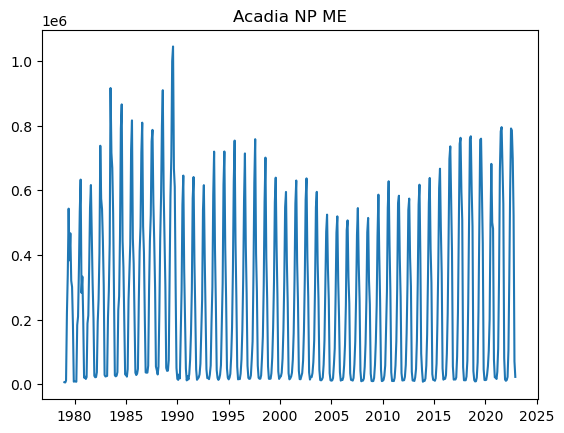

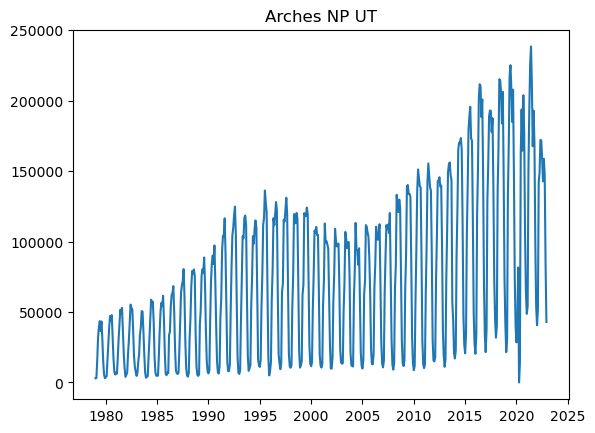

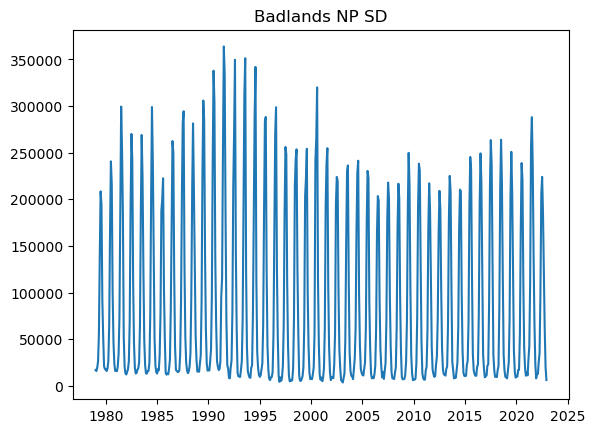

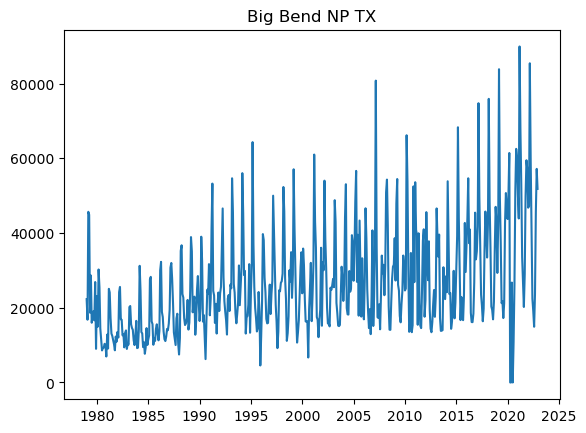

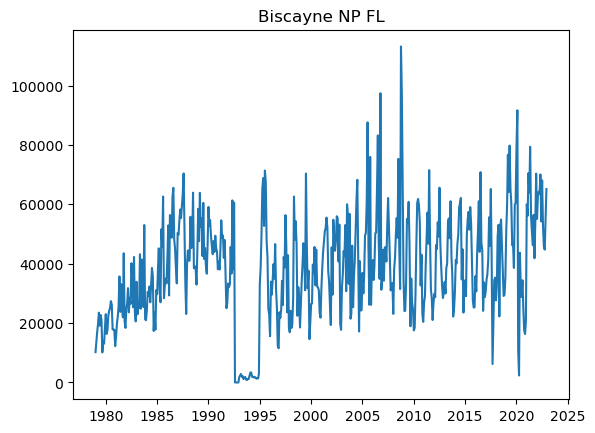

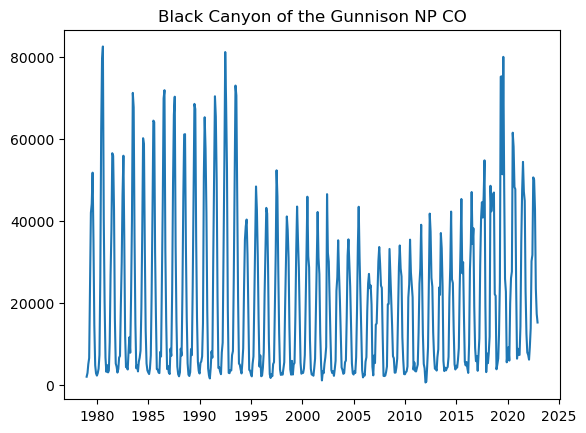

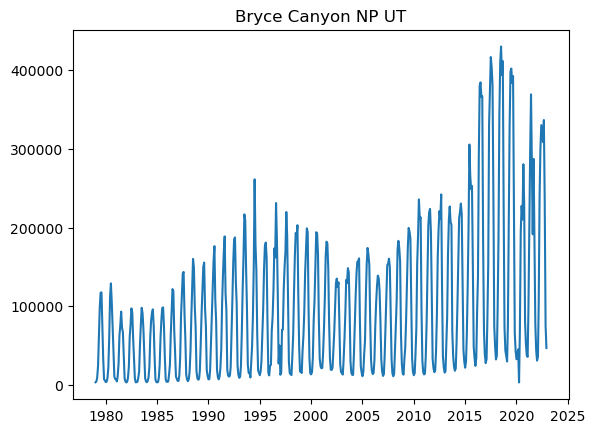

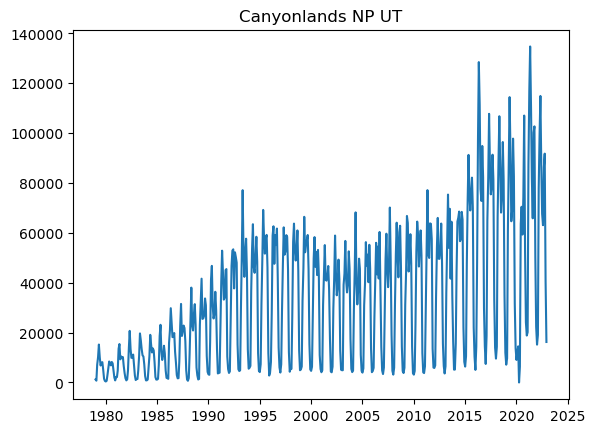

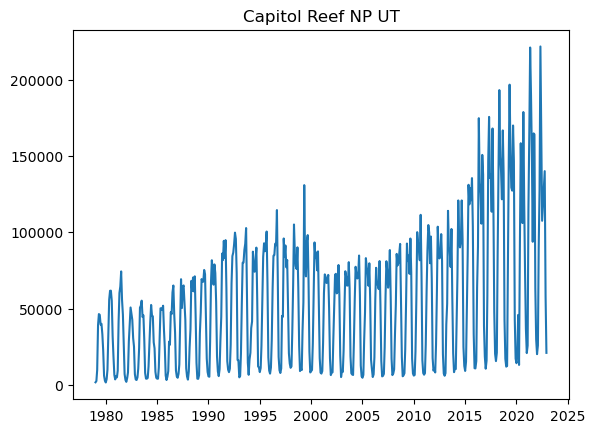

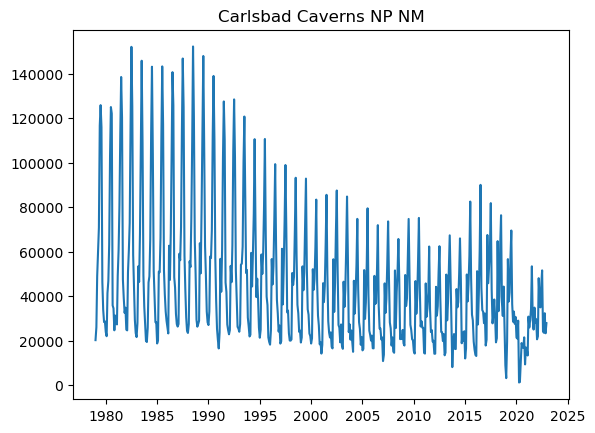

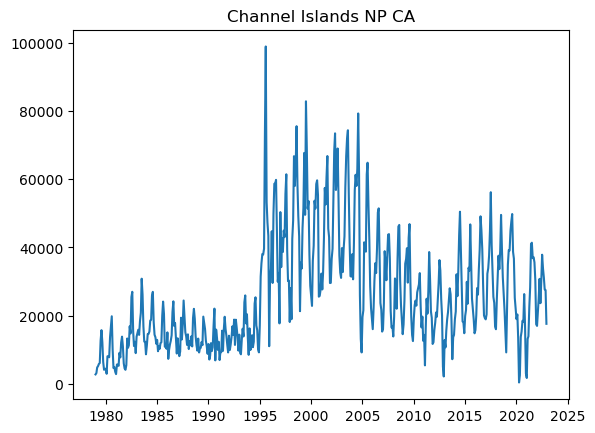

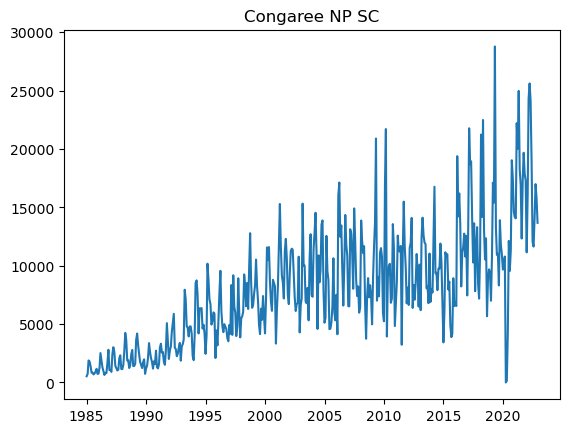

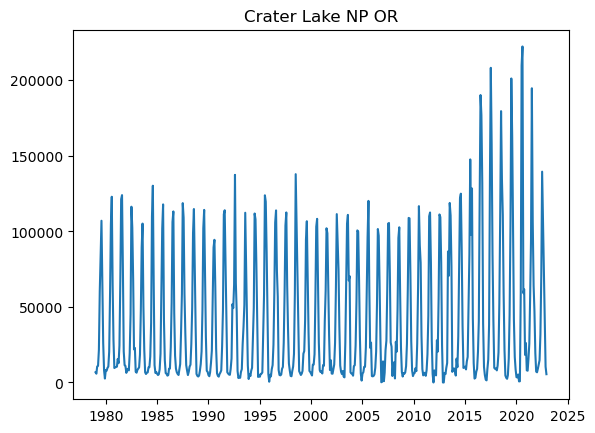

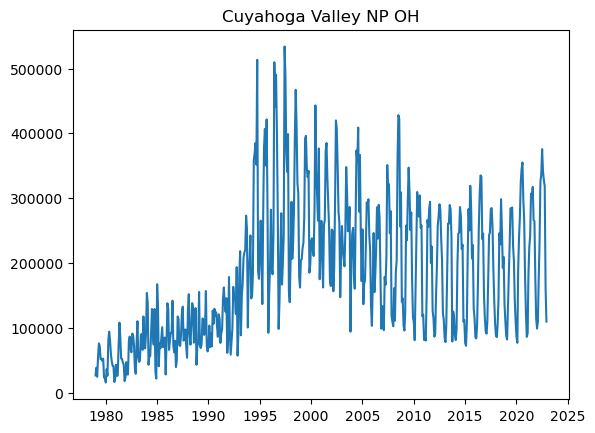

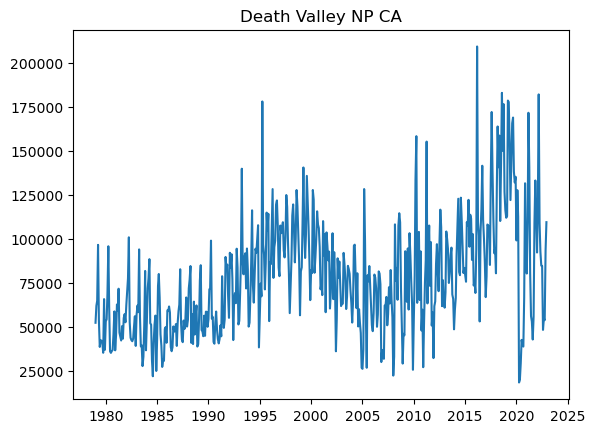

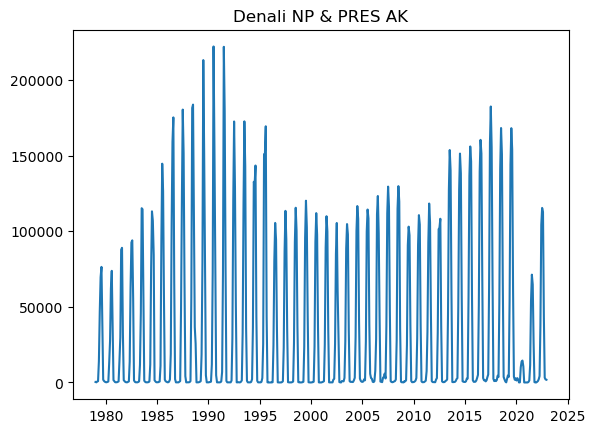

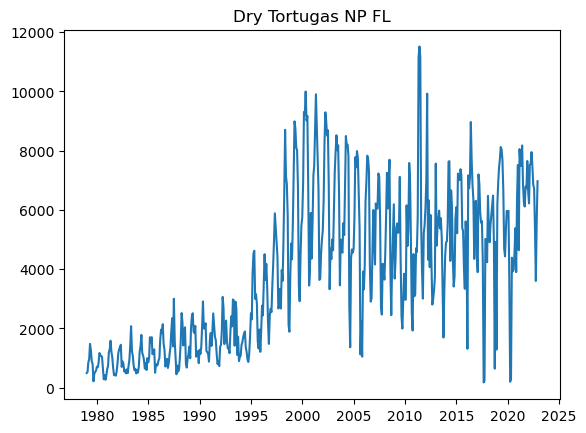

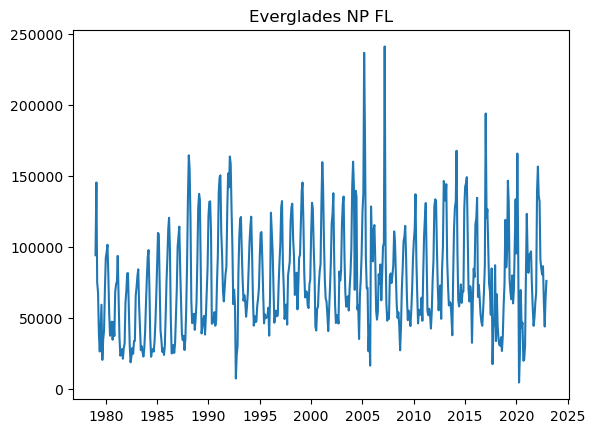

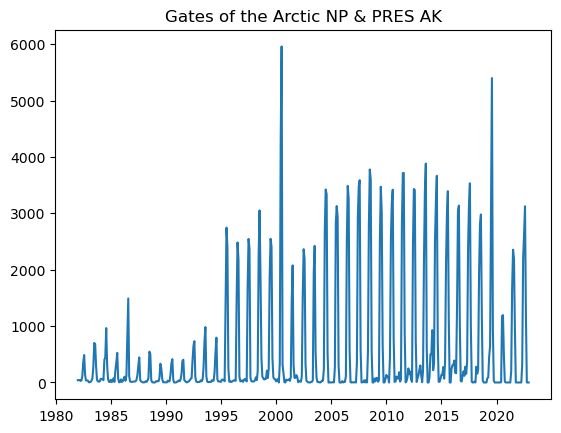

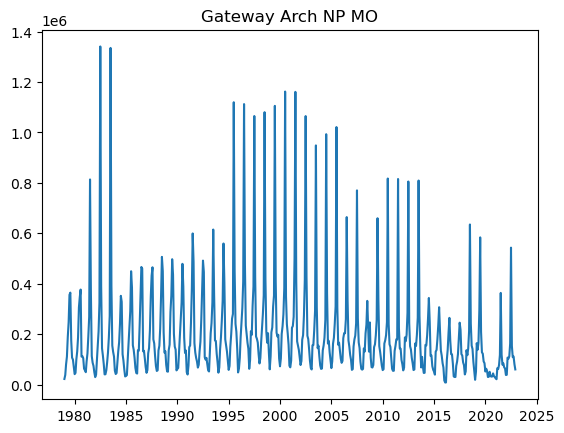

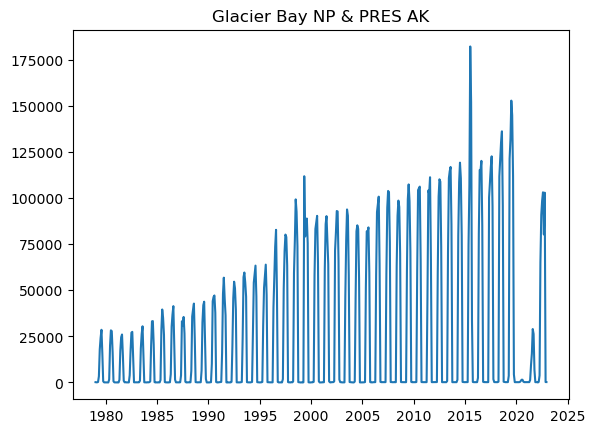

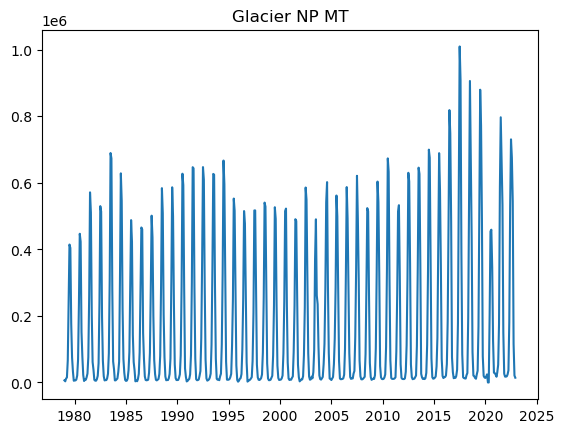

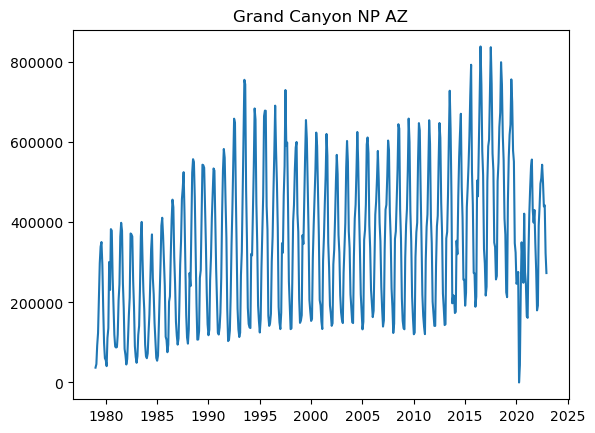

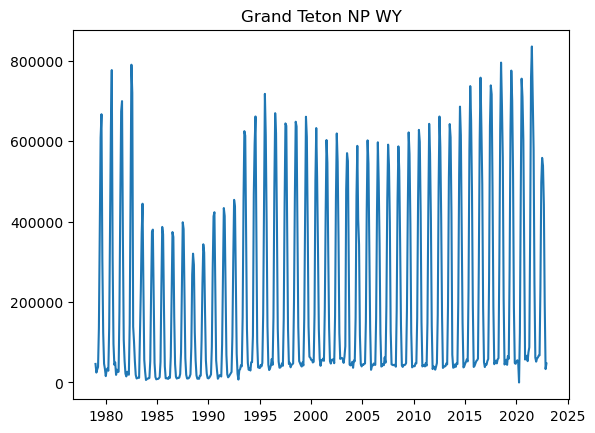

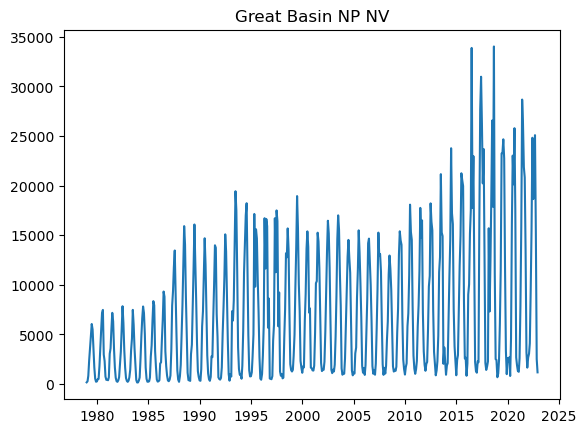

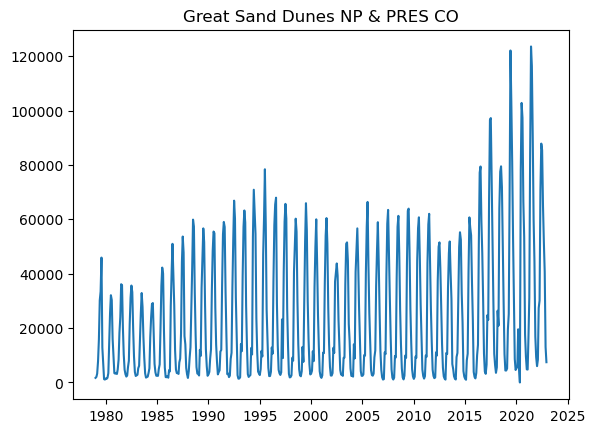

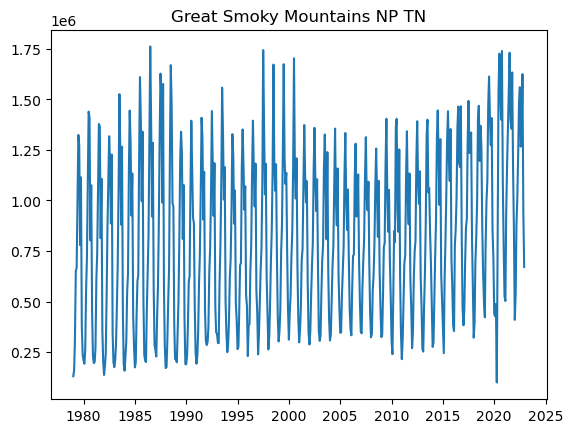

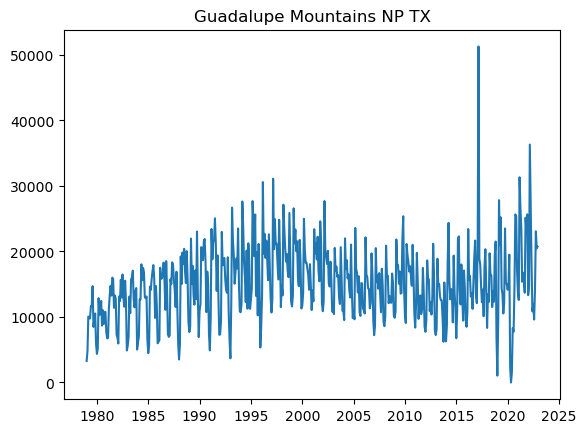

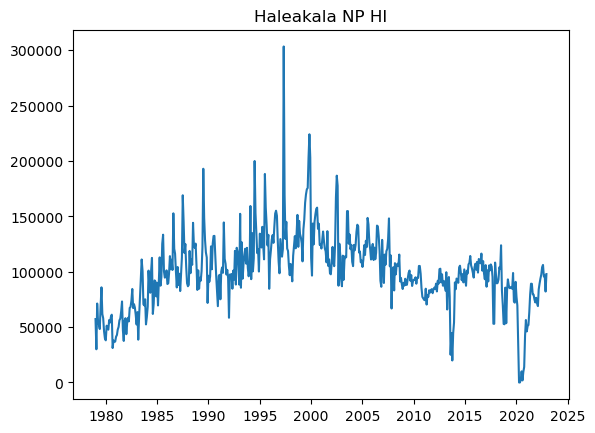

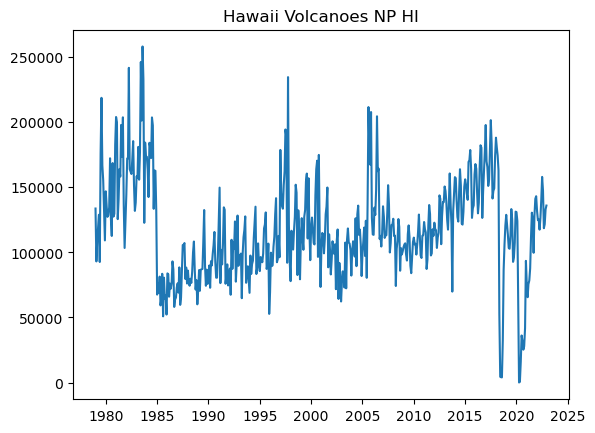

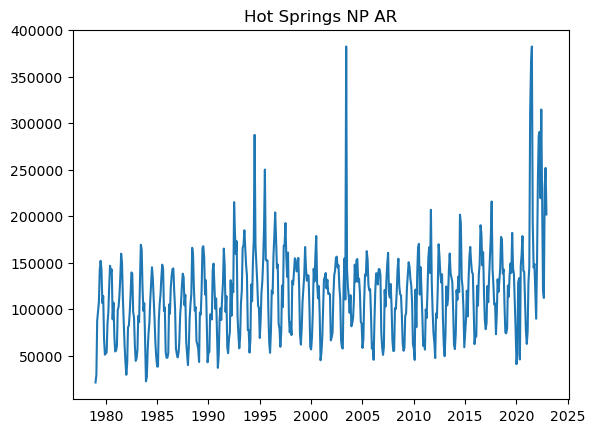

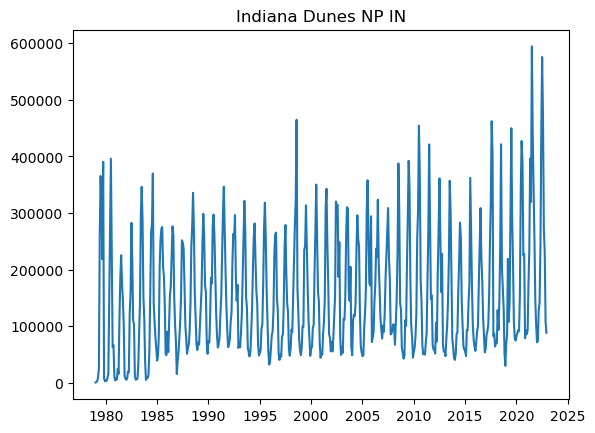

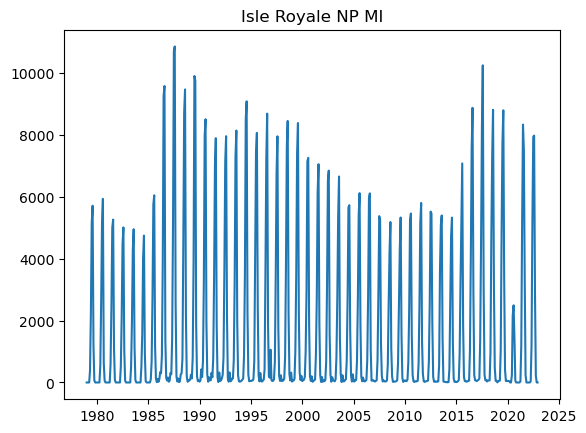

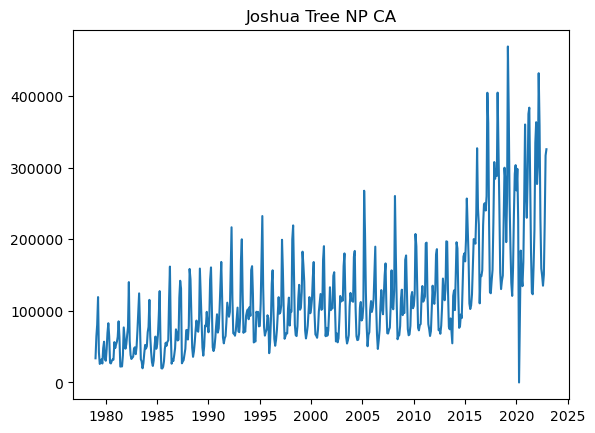

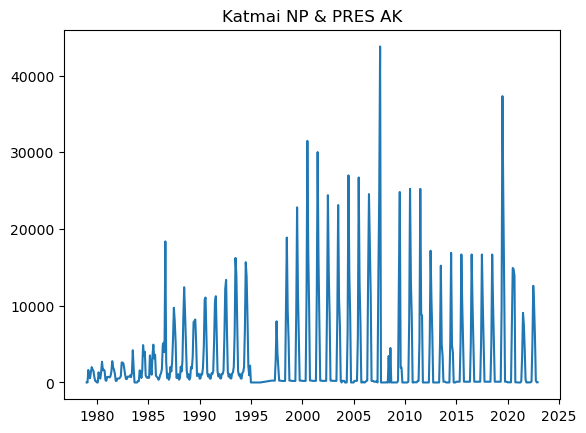

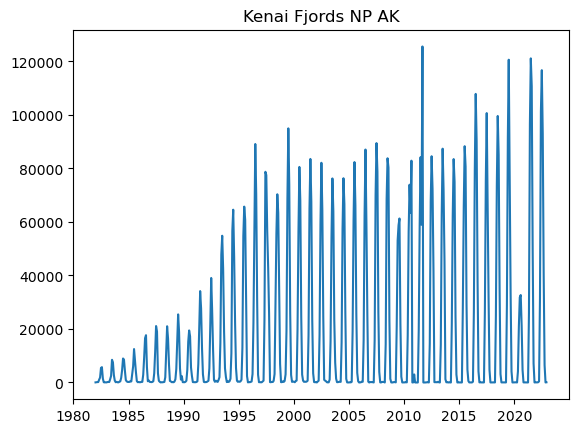

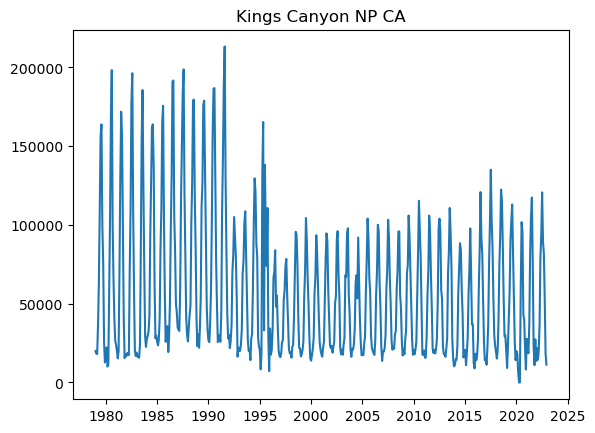

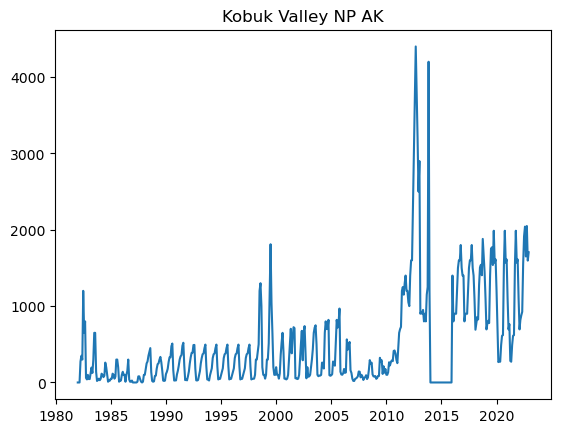

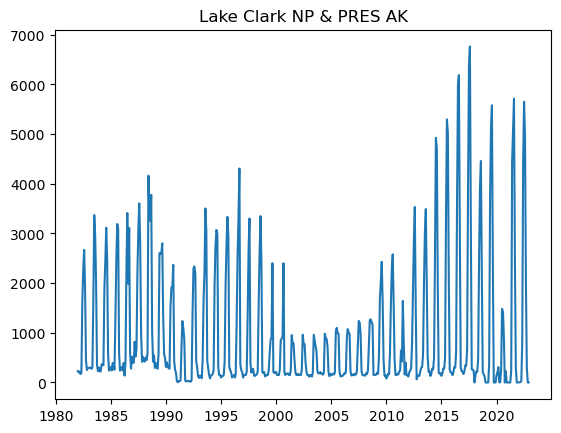

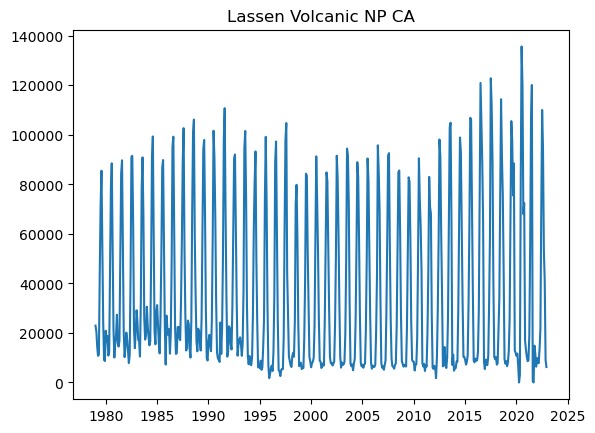

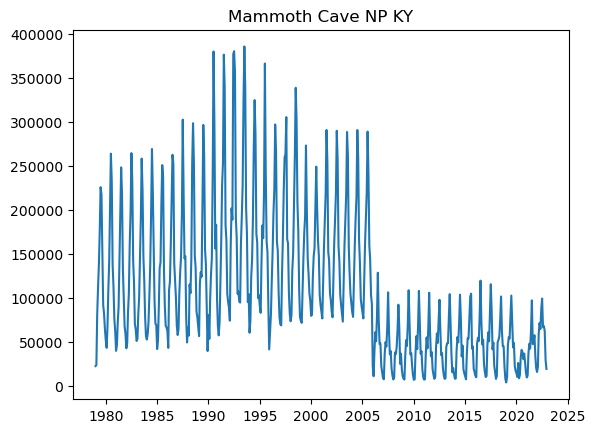

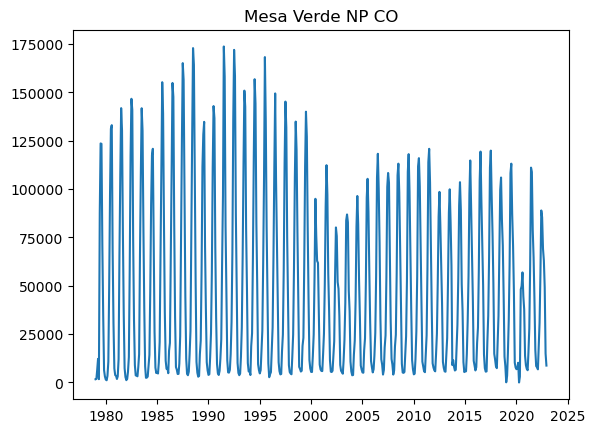

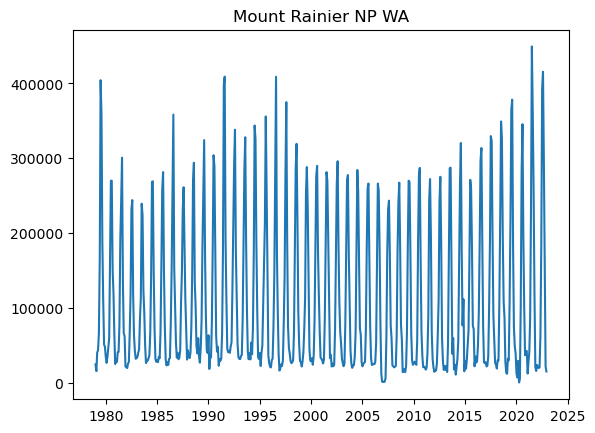

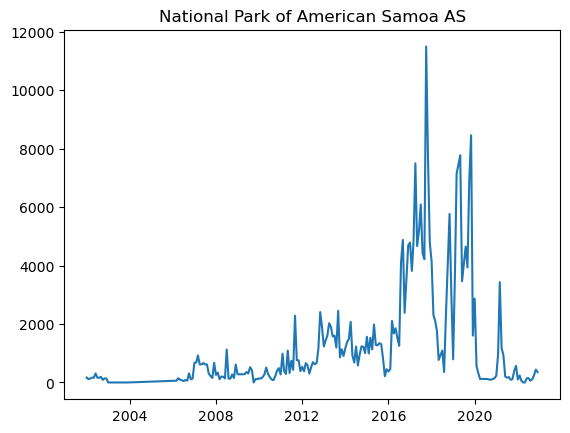

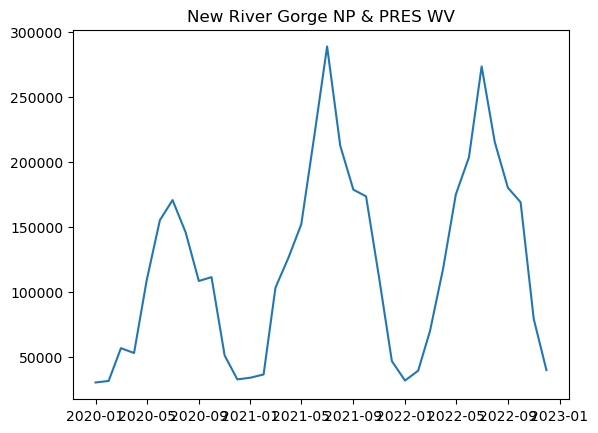

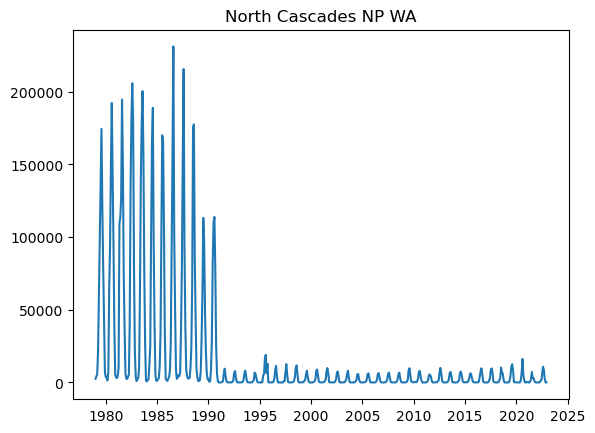

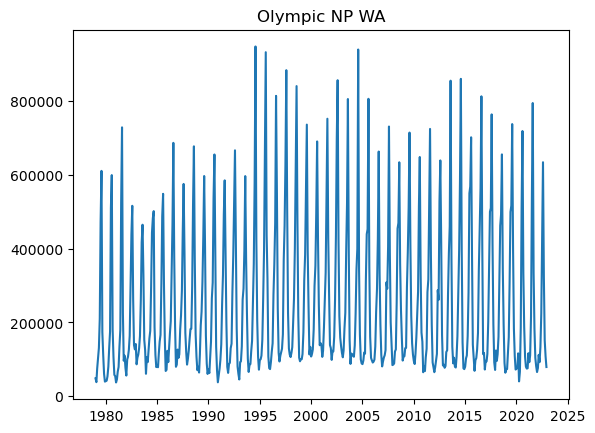

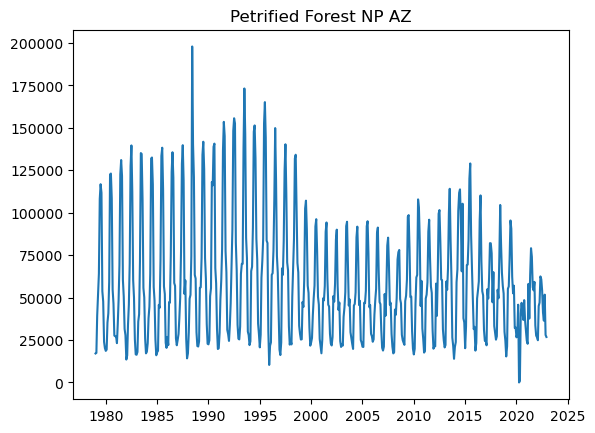

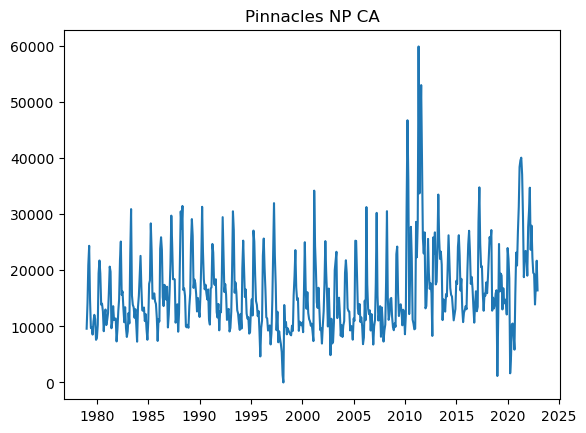

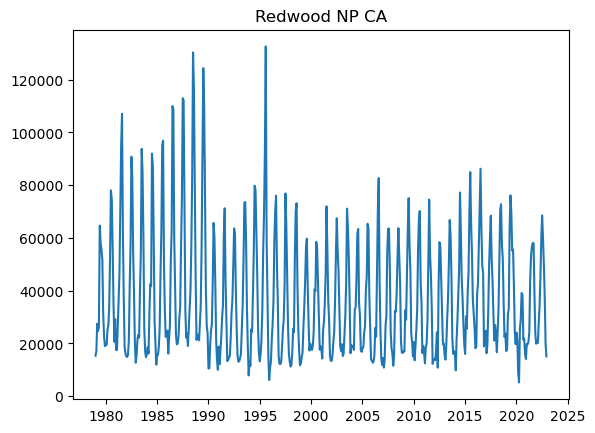

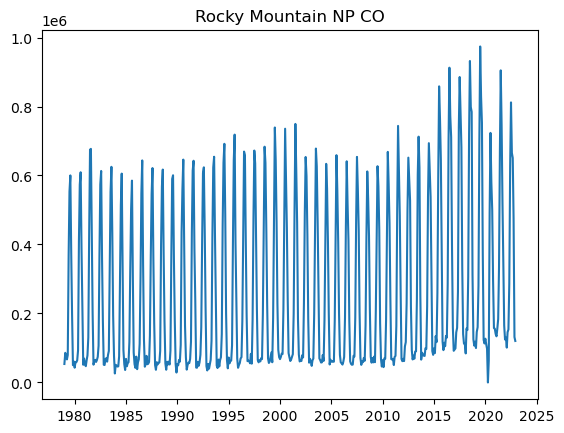

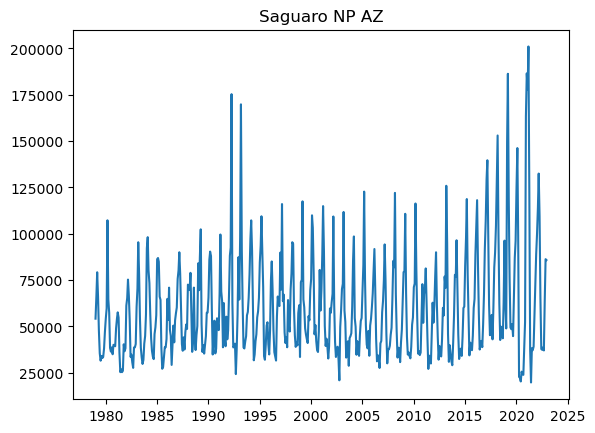

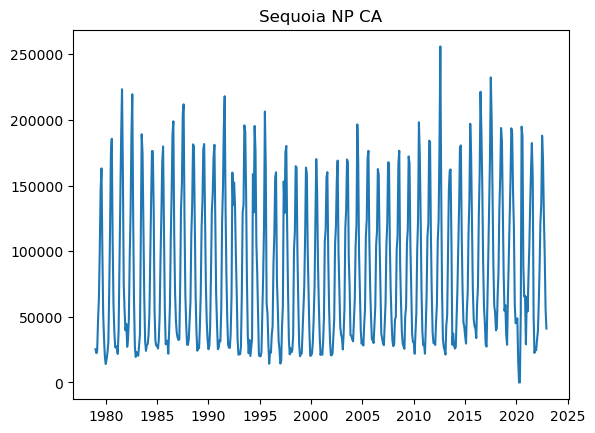

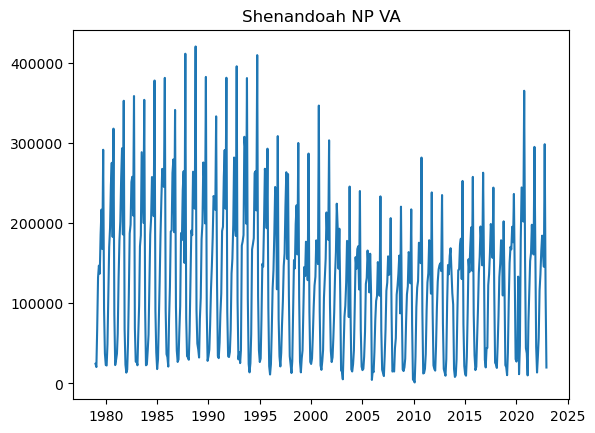

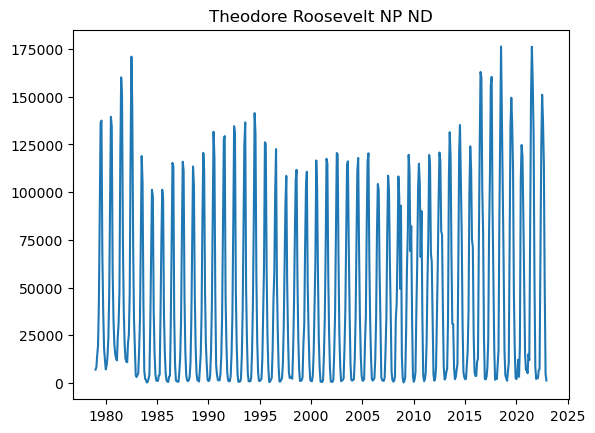

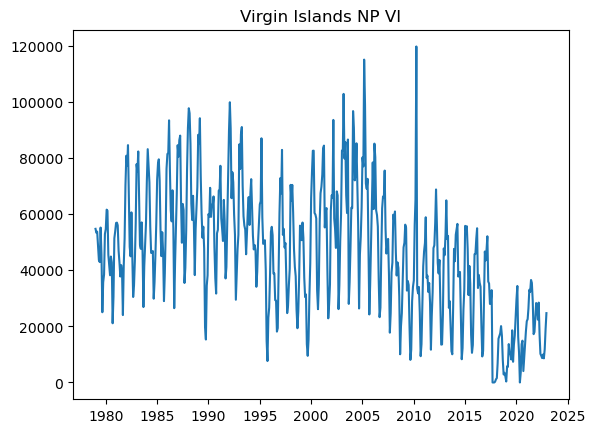

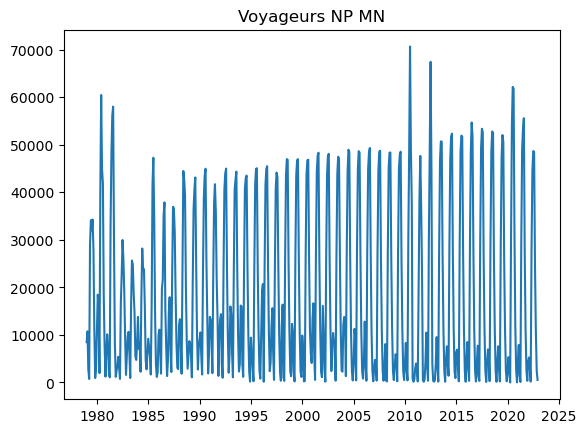

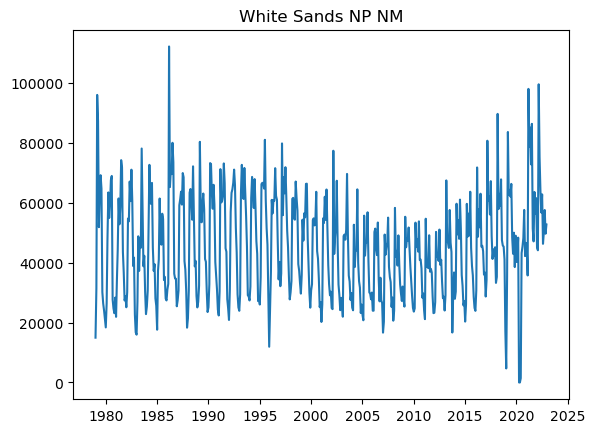

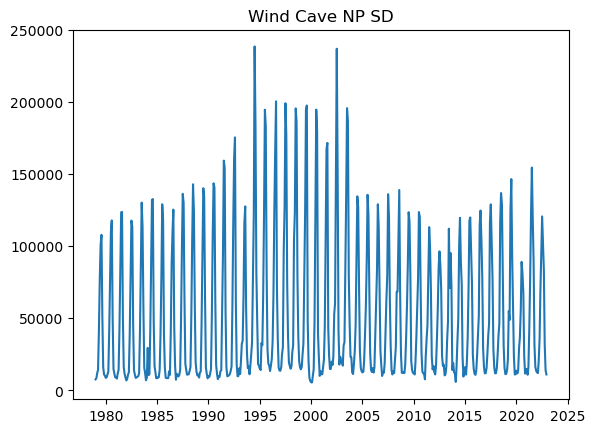

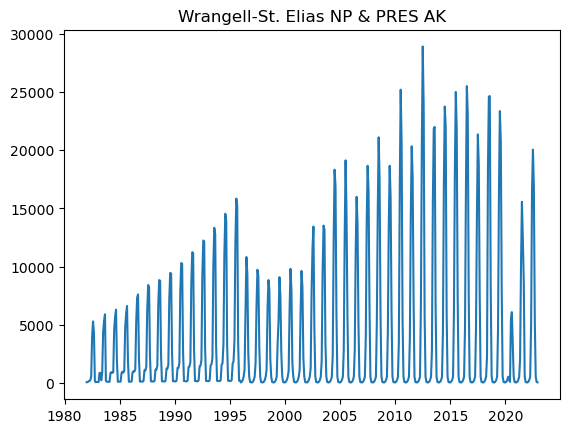

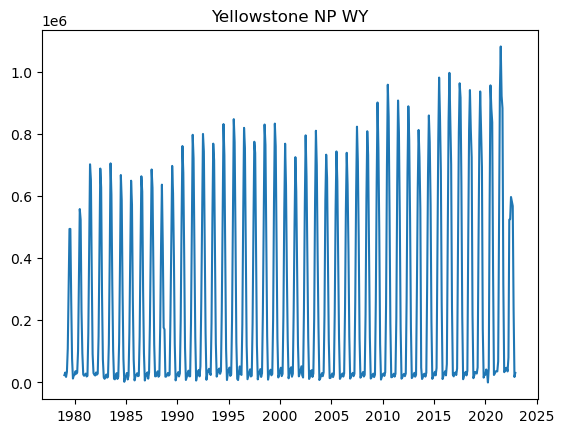

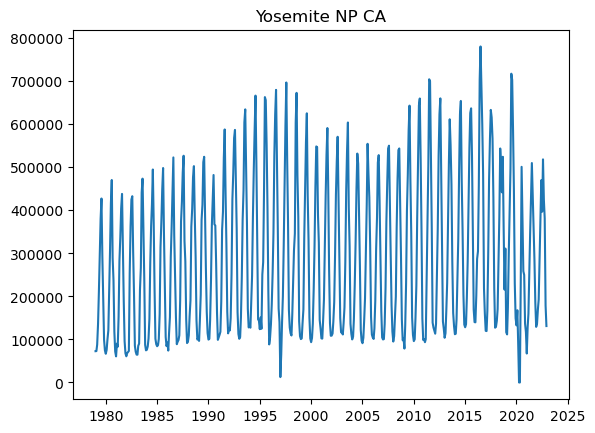

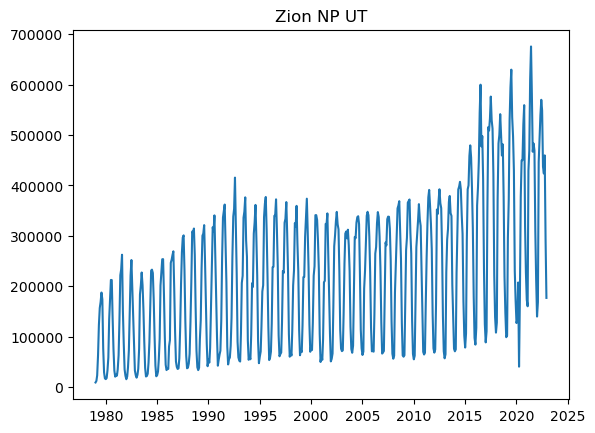

In [49]:
# graph visits over time for one park then make a for loop to iterate through the list of 62 NPs
for park in Parks_unique:
    park_df = pd.DataFrame(NP_visit.loc[NP_visit['ParkName'] == park,])
    plt.plot(park_df['RecreationVisits'])
    plt.title(park + " " + park_df['State'][0])
    plt.show()

In [32]:
#NP_visit2.to_csv('Data/NP_visit_for_merge.csv')

In [28]:
new = NP_visit1.filter(['ParkName', 'State'], axis = 1)
#new.reset_index(inplace= True)
new.head()

ParkName State
0  Acadia NP    ME
1  Acadia NP    ME
2  Acadia NP    ME
3  Acadia NP    ME
4  Acadia NP    ME

In [29]:
#new.drop('Month_Year', axis = 1, inplace = True)

In [30]:
new.drop_duplicates(ignore_index = True, inplace = True)
new.head()

ParkName State
0    Acadia NP    ME
1    Arches NP    UT
2  Badlands NP    SD
3  Big Bend NP    TX
4  Biscayne NP    FL

In [31]:
new['Park']= new['ParkName']
new['ParkName'] = new['ParkName'].str.rstrip(' & PRES')
new['ParkName'] = new['ParkName'].str.rstrip('NP')
new.head()

ParkName State         Park
0    Acadia     ME    Acadia NP
1    Arches     UT    Arches NP
2  Badlands     SD  Badlands NP
3  Big Bend     TX  Big Bend NP
4  Biscayne     FL  Biscayne NP

In [32]:
#space leftover from above
new['park'] = new['ParkName']+ 'National Park'

In [33]:
new.head()

ParkName State         Park                    park
0    Acadia     ME    Acadia NP    Acadia National Park
1    Arches     UT    Arches NP    Arches National Park
2  Badlands     SD  Badlands NP  Badlands National Park
3  Big Bend     TX  Big Bend NP  Big Bend National Park
4  Biscayne     FL  Biscayne NP  Biscayne National Park

In [34]:
#This makes the csv with the park names to join with the animal observation data
#new.to_csv('Data/parks_unique.csv')

In [148]:
new.loc[new['ParkName'].str.contains('Kings')]

ParkName State                         Park  \
60  Sequoia and Kings Canyon     CA  Sequoia and Kings Canyon NP   

                                      park  
60  Sequoia and Kings Canyon National Park